This code needs to be cleaned.

In [ ]:
!pip install ipython-autotime
%load_ext autotime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00
time: 256 µs (started: 2024-10-20 02:32:13 +00:00)


In [ ]:
import gzip
#import gensim
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

time: 515 µs (started: 2024-10-20 02:34:00 +00:00)


In [ ]:
!pip install fasttext
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296182 sha256=1c208555c7ef6bac5f4aac26ed5640999277787abbc92adda9bf98127cf8d63b
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext
time: 55.6 s (started: 2024-10-20 02:34:01 +00:00)


In [ ]:
import numpy as np

time: 395 µs (started: 2024-10-20 02:34:57 +00:00)


In [ ]:
import fasttext
import fasttext.util

time: 7.56 ms (started: 2024-10-20 02:34:57 +00:00)


In [ ]:
# Download the FastText model
# https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.zh.300.bin.gz
fasttext.util.download_model('zh', if_exists='ignore')



'cc.zh.300.bin'

time: 18min 52s (started: 2024-10-20 02:37:51 +00:00)


In [ ]:
# Load the pre-trained model
model = fasttext.load_model('cc.zh.300.bin')

time: 14.4 s (started: 2024-10-20 02:56:43 +00:00)


In [ ]:
# Create a dictionary of word embeddings
word_embeddings = {}

# Get all words in the vocabulary
words = model.get_words()

for word in words:
    word_embeddings[word] = model.get_word_vector(word)

print(f"Total number of words: {len(word_embeddings)}")
print(f"Dimension of each word vector: {len(next(iter(word_embeddings.values())))}")

# Example: Print the first 5 words and their vector dimensions
for word in list(word_embeddings.keys())[:5]:
    print(f"{word}: {word_embeddings[word].shape}")

Total number of words: 2000000
Dimension of each word vector: 300
，: (300,)
的: (300,)
。: (300,)
</s>: (300,)
、: (300,)
time: 22.2 s (started: 2024-10-20 02:56:58 +00:00)


In [ ]:
# Example: Print the first 25 words and their vector dimensions
for word in list(word_embeddings.keys())[25:50]:
    print(f"{word}: {word_embeddings[word].shape}")

:: (300,)
中: (300,)
.: (300,)
就: (300,)
他: (300,)
》: (300,)
《: (300,)
-: (300,)
你: (300,)
都: (300,)
上: (300,)
大: (300,)
！: (300,)
这: (300,)
为: (300,)
多: (300,)
与: (300,)
章: (300,)
「: (300,)
到: (300,)
」: (300,)
要: (300,)
？: (300,)
被: (300,)
而: (300,)
time: 81.4 ms (started: 2024-10-20 02:57:20 +00:00)


In [ ]:
from sklearn.preprocessing import normalize

def normalize_word_embeddings(embeddings):
    # Extract the word vectors and store them in a numpy array
    embeddings_values = np.array(list(embeddings.values()))

    # Normalize the word embeddings
    normalized_embeddings = normalize(embeddings_values)

    # Update the normalized embeddings back in the dictionary
    for i, word in enumerate(embeddings.keys()):
        embeddings[word] = normalized_embeddings[i]

    return embeddings

time: 2.83 s (started: 2024-10-20 02:57:20 +00:00)


In [ ]:
# Call the function to get normalized word embeddings
normalized_embeddings = normalize_word_embeddings(word_embeddings)
#random_normalized_embeddings = normalize_word_embeddings(random_embeddings)
#print(normalized_embeddings)

time: 3.84 s (started: 2024-10-20 04:14:42 +00:00)


In [ ]:
len(normalized_embeddings)

2000000

time: 5.18 ms (started: 2024-10-20 04:14:52 +00:00)


In [ ]:
len(normalized_embeddings.keys())

2000000

time: 2.98 ms (started: 2024-10-20 04:15:16 +00:00)


In [ ]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 20.2 MB/s eta 0:00:00
time: 4.64 s (started: 2024-10-20 04:15:16 +00:00)


In [ ]:
import faiss
import matplotlib.pyplot as plt

time: 41.9 ms (started: 2024-10-20 04:15:20 +00:00)


In [ ]:
#Using spheres
#This code can be run.

def correlation_dimension_faiss(data, max_radius, num_radii=20,k=100):
    """
    Calculate the correlation dimension of the dataset using Faiss.

    :param data: numpy array of shape (n_samples, n_features)
    :param max_radius: maximum radius for correlation sum calculation
    :param num_radii: number of radii to use for calculation
    :return: radii, correlation_sum
    """
    n_samples, n_features = data.shape

    # Convert data to float32 (required by Faiss)
    data = data.astype(np.float32)

    # Create Faiss index
    index = faiss.IndexFlatL2(n_features)
    index.add(data)

    # Generate radii
    radii = np.logspace(-1, np.log10(max_radius), num_radii)

    # Calculate correlation sum for each radius
    correlation_sum = np.zeros(num_radii)
    for i, r in enumerate(radii):
        # Count number of neighbors within radius r for each point
        #print(index.range_search(data, r**2))
        #neighbors = index.range_search(data, r**2)  # Faiss uses squared distances
        #correlation_sum[i] = len(neighbors) / (n_samples * (n_samples - 1))

        distances, _ = index.search(data, k)

        # Count number of neighbors within radius r for each point
        count_within_radius = np.sum(distances < r**2, axis=1) - 1  # subtract 1 to exclude the point itself
        total_count = np.sum(count_within_radius)
        correlation_sum[i] = max(total_count / (n_samples * (n_samples - 1)), 1e-10)

    return radii, correlation_sum

def estimate_fractal_dimension(radii, correlation_sum):
    """
    Estimate fractal dimension from the slope of log-log plot.

    :param radii: array of radii used
    :param correlation_sum: array of correlation sums
    :return: estimated fractal dimension
    """
    log_radii = np.log(radii)
    log_correlation_sum = np.log(correlation_sum)

    print(log_radii,log_correlation_sum)
    # Linear regression to find slope
    coeffs = np.polyfit(log_radii, log_correlation_sum, deg=1)
    return coeffs[0]

time: 949 µs (started: 2024-10-20 04:15:20 +00:00)


In [ ]:
"""if __name__ == "__main__":

    n_samples, n_features = len(random_normalized_embeddings), len(list(random_normalized_embeddings.values())[0])
    embeddings_list = list(random_normalized_embeddings.values())

    # Convert to a NumPy array with dtype float32
    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    # Calculate correlation dimension
    max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space
    radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)

    # Estimate fractal dimension
    fractal_dim = estimate_fractal_dimension(radii, correlation_sum)

    print(f"Estimated fractal dimension: {fractal_dim:.2f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.loglog(radii, correlation_sum, 'bo-')
    plt.xlabel('Radius (r)')
    plt.ylabel('Correlation Sum C(r)')
    plt.title('Correlation Dimension Analysis')
    plt.grid(True)
    plt.show()

    #Word2vec google news - hugging face 3M words embeddings,Russian National corpus,, fasttext embeddings.
    #Complete works of shakesphere, word to word path connection, Projection wise fractal dimension calculation
    #Understand brazillians code.
    """
    # we don't randomize in this experiment

'if __name__ == "__main__":\n\n    n_samples, n_features = len(random_normalized_embeddings), len(list(random_normalized_embeddings.values())[0])\n    embeddings_list = list(random_normalized_embeddings.values())\n\n    # Convert to a NumPy array with dtype float32\n    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)\n\n    # Calculate correlation dimension\n    max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space\n    radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)\n\n    # Estimate fractal dimension\n    fractal_dim = estimate_fractal_dimension(radii, correlation_sum)\n\n    print(f"Estimated fractal dimension: {fractal_dim:.2f}")\n\n    # Plot results\n    plt.figure(figsize=(10, 6))\n    plt.loglog(radii, correlation_sum, \'bo-\')\n    plt.xlabel(\'Radius (r)\')\n    plt.ylabel(\'Correlation Sum C(r)\')\n    plt.title(\'Correlation Dimension Analysis\')\n    plt.grid(True)\n    plt.show()\

time: 2.3 ms (started: 2024-10-20 04:15:20 +00:00)




```
# This is formatted as code
**KeyboardInterrupt**                         Traceback (most recent call last)
<ipython-input-26-e11b30dddfd9> in <cell line: 1>()
      9     # Calculate correlation dimension
     10     max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space
---> 11     radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)
     12
     13     # Estimate fractal dimension

2 frames
/usr/local/lib/python3.10/dist-packages/faiss/swigfaiss.py in search(self, n, x, k, distances, labels)
   2144
   2145     def search(self, n, x, k, distances, labels):
-> 2146         return _swigfaiss.IndexFlat_search(self, n, x, k, distances, labels)
   2147
   2148     def range_search(self, n, x, radius, result):

**KeyboardInterrupt**:
```



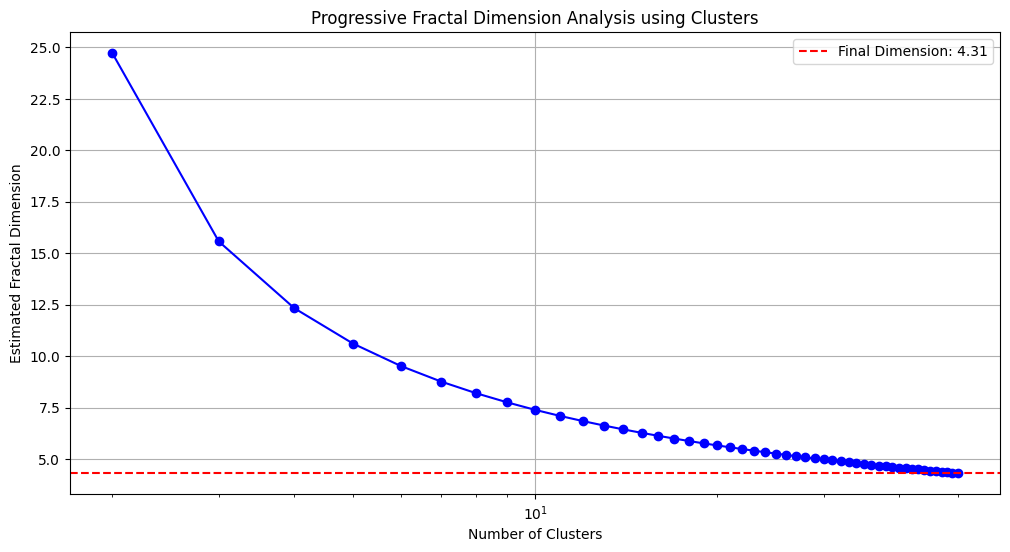


Number of clusters: 2
Cluster sizes: [ 848931 1151069]
Cluster fractal dimensions: [19.69528777 20.13454289]
Total fractal dimension: 24.7210

Number of clusters: 3
Cluster sizes: [567289 656807 775904]
Cluster fractal dimensions: [12.0594174  12.19278688 12.34446785]
Total fractal dimension: 15.5699

Number of clusters: 4
Cluster sizes: [471911 439689 760192 328208]
Cluster fractal dimensions: [9.42407764 9.37306196 9.76800216 9.16212544]
Total fractal dimension: 12.3254

Number of clusters: 5
Cluster sizes: [415845 648116 495822 131050 309167]
Cluster fractal dimensions: [8.03887356 8.31459534 8.1481691  7.32139719 7.85469061]
Total fractal dimension: 10.6086

Number of clusters: 6
Cluster sizes: [344871 342373 455940 399638 258193 198985]
Cluster fractal dimensions: [7.11642714 7.11236987 7.27224648 7.19868634 6.95487473 6.80949923]
Total fractal dimension: 9.5182

Number of clusters: 7
Cluster sizes: [238099 311511 197701 291336 257562 307573 396218]
Cluster fractal dimensions: [6

In [ ]:
#import faiss
#import matplotlib.pyplot as plt

def cluster_fractal_analysis(data, max_clusters, min_clusters=2):
    #1st row - cluster_sizes
    #2nd row - fractal dimension of each box/cluster
    #3rd row - average.
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    results = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans = faiss.Kmeans(d=n_features, k=k, niter=300, verbose=False)
        kmeans.train(data)
        _, labels = kmeans.index.search(data, 1)

        # Calculate cluster sizes
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes = counts[counts > 0]

        # Calculate fractal dimension for each cluster
        cluster_fractal_dims = np.log(cluster_sizes) / np.log(k)

        # Calculate total fractal dimension
        log_n = np.log(k)
        log_m = np.log(np.sum(cluster_sizes * np.log(cluster_sizes)))
        total_dimension = log_m / log_n if log_n != 0 else np.nan

        # Store results
        results.append({
            'num_clusters': k,
            'cluster_sizes': cluster_sizes,
            'cluster_fractal_dims': cluster_fractal_dims,
            'total_fractal_dim': total_dimension
        })

    return results

def cluster_fractal_dimension(data, max_clusters, min_clusters=2):
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    dimensions = []
    cluster_counts = range(min_clusters, max_clusters + 1)

    for k in cluster_counts:
        kmeans = faiss.Kmeans(d=n_features, k=k, niter=300, verbose=False)
        kmeans.train(data)
        _, labels = kmeans.index.search(data, 1)

        # Calculate cluster sizes
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes = counts[counts > 0]

        # Calculate fractal dimension using box-counting method
        log_n = np.log(k)
        log_m = np.log(np.sum(cluster_sizes * np.log(cluster_sizes)))
        dimension = log_m / log_n if log_n != 0 else np.nan

        dimensions.append(dimension)

    return cluster_counts, dimensions

def progressive_fractal_dimension(data, max_clusters, min_clusters=2):
    cluster_counts, dimensions = cluster_fractal_dimension(data, max_clusters, min_clusters)
    return cluster_counts, dimensions

# Example usage
if __name__ == "__main__":
    # Assuming random_normalized_embeddings is your dictionary of word embeddings
    n_samples = len(normalized_embeddings)
    n_features = len(list(normalized_embeddings.values())[0])
    embeddings_list = list(normalized_embeddings.values())

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    #word_embeddings_fractal = word_embeddings_fractal[0:100000]

    max_clusters = min(50, n_samples // 2)  # Adjust based on your data size
    cluster_counts, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_clusters)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_counts, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis using Clusters')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()


    results = cluster_fractal_analysis(word_embeddings_fractal, max_clusters)

    # Print results
    for result in results:
        print(f"\nNumber of clusters: {result['num_clusters']}")
        print("Cluster sizes:", result['cluster_sizes'])
        print("Cluster fractal dimensions:", result['cluster_fractal_dims'])
        print(f"Total fractal dimension: {result['total_fractal_dim']:.4f}")

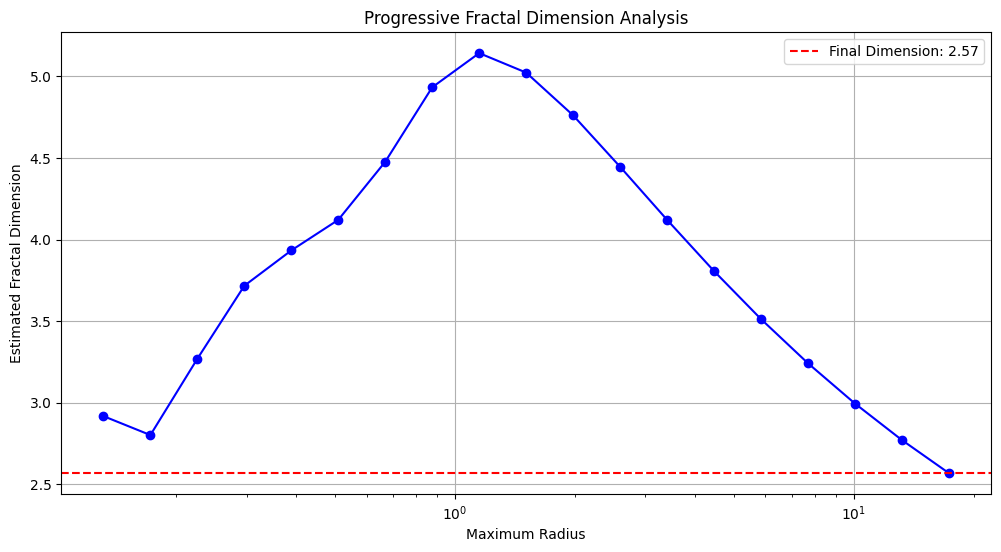

Final estimated fractal dimension: 2.57
Up to radius 0.1312: Estimated dimension = 2.92
Up to radius 0.1720: Estimated dimension = 2.80
Up to radius 0.2257: Estimated dimension = 3.27
Up to radius 0.2960: Estimated dimension = 3.72
Up to radius 0.3882: Estimated dimension = 3.93
Up to radius 0.5092: Estimated dimension = 4.12
Up to radius 0.6679: Estimated dimension = 4.48
Up to radius 0.8761: Estimated dimension = 4.93
Up to radius 1.1491: Estimated dimension = 5.14
Up to radius 1.5073: Estimated dimension = 5.02
Up to radius 1.9770: Estimated dimension = 4.76
Up to radius 2.5932: Estimated dimension = 4.45
Up to radius 3.4013: Estimated dimension = 4.12
Up to radius 4.4613: Estimated dimension = 3.81
Up to radius 5.8517: Estimated dimension = 3.51
Up to radius 7.6754: Estimated dimension = 3.24
Up to radius 10.0675: Estimated dimension = 2.99
Up to radius 13.2051: Estimated dimension = 2.77
Up to radius 17.3205: Estimated dimension = 2.57
time: 9h 11min 48s (started: 2024-10-20 04:15

In [ ]:
#Track progressive fractal dimension value, that is if I stop at 10^0 what is the fractal dimension before that?

def correlation_dimension_faiss(data, max_radius, num_radii=20, k=100):
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    index = faiss.IndexFlatL2(n_features)
    index.add(data)

    radii = np.logspace(-1, np.log10(max_radius), num_radii)
    correlation_sum = np.zeros(num_radii)

    distances, _ = index.search(data, k)

    for i, r in enumerate(radii):
        count_within_radius = np.sum(distances < r**2, axis=1) - 1
        total_count = np.sum(count_within_radius)
        correlation_sum[i] = max(total_count / (n_samples * (n_samples - 1)), 1e-10)

    return radii, correlation_sum

def estimate_fractal_dimension(radii, correlation_sum):
    valid_indices = correlation_sum > 0
    log_radii = np.log(radii[valid_indices])
    log_correlation_sum = np.log(correlation_sum[valid_indices])

    if len(log_radii) < 2:
        return np.nan

    coeffs = np.polyfit(log_radii, log_correlation_sum, deg=1)
    return coeffs[0]

def progressive_fractal_dimension(data, max_radius, num_radii=20, k=100):
    radii, correlation_sum = correlation_dimension_faiss(data, max_radius, num_radii, k)
    progressive_dimensions = []

    for i in range(2, len(radii) + 1):
        dim = estimate_fractal_dimension(radii[:i], correlation_sum[:i])
        progressive_dimensions.append(dim)

    return radii[1:], progressive_dimensions

# Example usage
if __name__ == "__main__":



    n_samples, n_features = len(normalized_embeddings), len(list(normalized_embeddings.values())[0])
    embeddings_list = list(normalized_embeddings.values())



    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    max_radius = np.sqrt(n_features)
    radii, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_radius)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(radii, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Maximum Radius')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()

    print(f"Final estimated fractal dimension: {final_dim:.2f}")

    # Print progressive dimensions
    for i, (r, dim) in enumerate(zip(radii, progressive_dims)):
        print(f"Up to radius {r:.4f}: Estimated dimension = {dim:.2f}")

##for 100K##

In [ ]:
%ls

cc.zh.300.bin  cc.zh.300.bin.gz  sample_data/
time: 106 ms (started: 2024-10-20 14:58:28 +00:00)


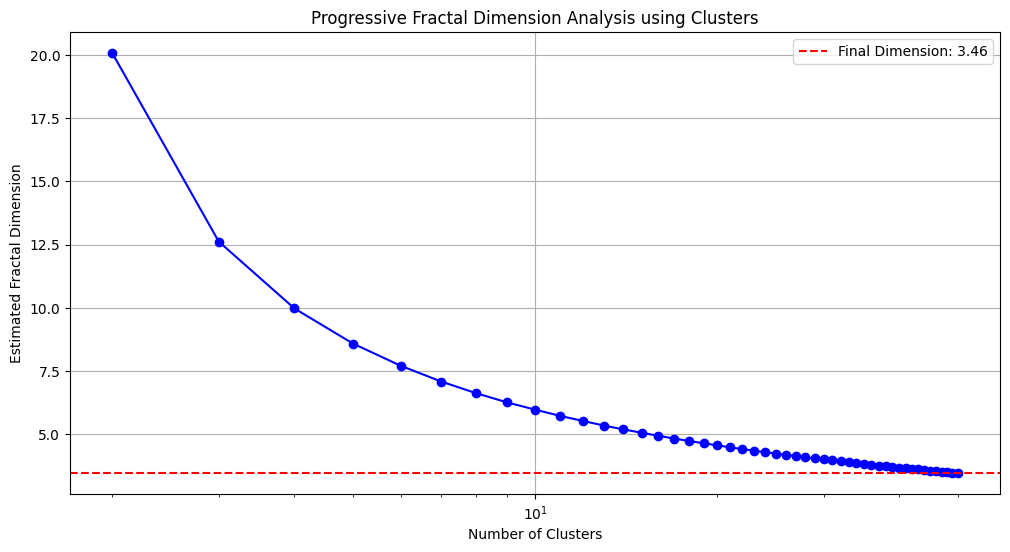


Number of clusters: 2
Cluster sizes: [20274 79726]
Cluster fractal dimensions: [14.30734314 16.28276267]
Total fractal dimension: 20.0702

Number of clusters: 3
Cluster sizes: [19991 32723 47286]
Cluster fractal dimensions: [9.01413315 9.46269542 9.79778732]
Total fractal dimension: 12.6173

Number of clusters: 4
Cluster sizes: [19443 18447 31528 30582]
Cluster fractal dimensions: [7.12348161 7.0855493  7.47217302 7.45019757]
Total fractal dimension: 9.9770

Number of clusters: 5
Cluster sizes: [10844 33225 31540 10483 13908]
Cluster fractal dimensions: [5.77305104 6.46875397 6.43641596 5.75201448 5.92767165]
Total fractal dimension: 8.5860

Number of clusters: 6
Cluster sizes: [31433 30411 11854 13570  4364  8368]
Cluster fractal dimensions: [5.77957798 5.76113024 5.23531244 5.31076683 4.67760572 5.04095016]
Total fractal dimension: 7.7060

Number of clusters: 7
Cluster sizes: [ 8650 10841  7546 12042 11969 18739 30213]
Cluster fractal dimensions: [4.65865015 4.77467602 4.58848159 4.

In [ ]:

# Example usage for 100K
if __name__ == "__main__":
    # Assuming random_normalized_embeddings is your dictionary of word embeddings
    n_samples = len(normalized_embeddings)
    n_features = len(list(normalized_embeddings.values())[0])
    embeddings_list = list(normalized_embeddings.values())

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    word_embeddings_fractal = word_embeddings_fractal[0:100000]

    max_clusters = min(50, n_samples // 2)  # Adjust based on your data size
    cluster_counts, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_clusters)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_counts, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis using Clusters')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()


    results = cluster_fractal_analysis(word_embeddings_fractal, max_clusters)

    # Print results
    for result in results:
        print(f"\nNumber of clusters: {result['num_clusters']}")
        print("Cluster sizes:", result['cluster_sizes'])
        print("Cluster fractal dimensions:", result['cluster_fractal_dims'])
        print(f"Total fractal dimension: {result['total_fractal_dim']:.4f}")

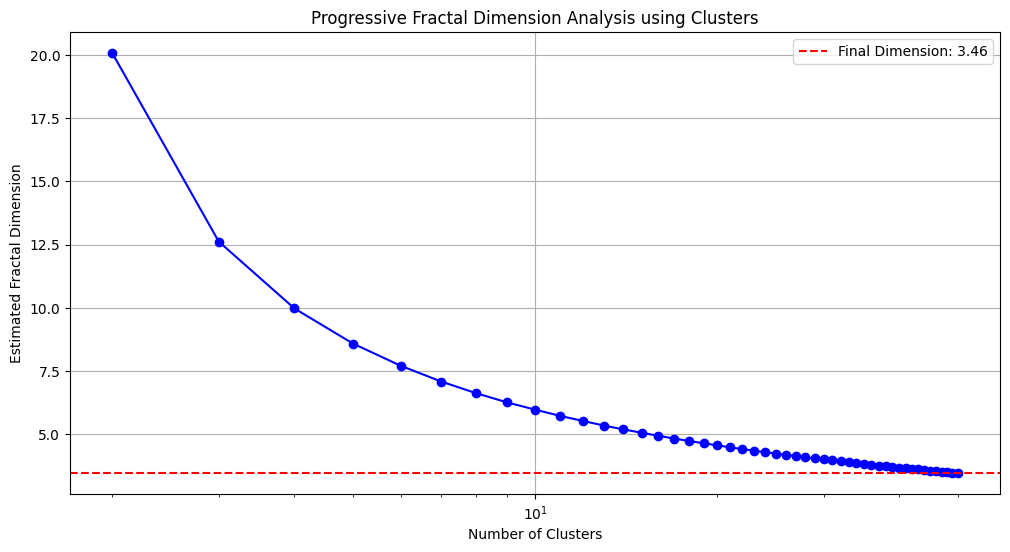


Number of clusters: 2
Cluster sizes: [20274 79726]
Cluster fractal dimensions: [14.30734314 16.28276267]
Total fractal dimension: 20.0702

Number of clusters: 3
Cluster sizes: [19991 32723 47286]
Cluster fractal dimensions: [9.01413315 9.46269542 9.79778732]
Total fractal dimension: 12.6173

Number of clusters: 4
Cluster sizes: [19443 18447 31528 30582]
Cluster fractal dimensions: [7.12348161 7.0855493  7.47217302 7.45019757]
Total fractal dimension: 9.9770

Number of clusters: 5
Cluster sizes: [10844 33225 31540 10483 13908]
Cluster fractal dimensions: [5.77305104 6.46875397 6.43641596 5.75201448 5.92767165]
Total fractal dimension: 8.5860

Number of clusters: 6
Cluster sizes: [31433 30411 11854 13570  4364  8368]
Cluster fractal dimensions: [5.77957798 5.76113024 5.23531244 5.31076683 4.67760572 5.04095016]
Total fractal dimension: 7.7060

Number of clusters: 7
Cluster sizes: [ 8650 10841  7546 12042 11969 18739 30213]
Cluster fractal dimensions: [4.65865015 4.77467602 4.58848159 4.

In [ ]:
# for 100K
if __name__ == "__main__":
    # Assuming random_normalized_embeddings is your dictionary of word embeddings
    n_samples = len(normalized_embeddings)
    n_features = len(list(normalized_embeddings.values())[0])
    embeddings_list = list(normalized_embeddings.values())

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    word_embeddings_fractal = word_embeddings_fractal[0:100000]

    max_clusters = min(50, n_samples // 2)  # Adjust based on your data size
    cluster_counts, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_clusters)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_counts, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis using Clusters')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()


    results = cluster_fractal_analysis(word_embeddings_fractal, max_clusters)

    # Print results
    for result in results:
        print(f"\nNumber of clusters: {result['num_clusters']}")
        print("Cluster sizes:", result['cluster_sizes'])
        print("Cluster fractal dimensions:", result['cluster_fractal_dims'])
        print(f"Total fractal dimension: {result['total_fractal_dim']:.4f}")